In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import random
random.seed(0)
import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.12.0'

In [3]:
from keras.datasets import fashion_mnist
(train_X,train_y),(test_X,test_y) = fashion_mnist.load_data()

# Analyze the Data

In [4]:
print ('train data shape :',train_X.shape,train_y.shape)

train data shape : (60000, 28, 28) (60000,)


In [5]:
print ('test data shape :',test_X.shape,test_y.shape)

test data shape : (10000, 28, 28) (10000,)


# Find the unique numbers from the train labels


In [6]:
classes = np.unique(train_y)
nclasses  = len(classes)
print('output classes',classes)
print('total number of outputs',nclasses)

output classes [0 1 2 3 4 5 6 7 8 9]
total number of outputs 10


Text(0.5, 1.0, 'Ground Truth : 9')

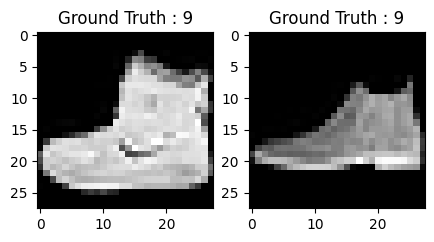

In [7]:
# Create a figure with a size of 5 inches by 5 inches
plt.figure(figsize=[5,5])

# Display the first image in the training dataset using a gray colormap
plt.subplot(121)  # Use subplot to position the image on the left side
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_y[0]))  # Add a title showing the ground truth label of the image

# Display the first image in the testing dataset using a gray colormap
plt.subplot(122)  # Use subplot to position the image on the right side
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_y[0]))  # Add a title showing the ground truth label of the image


# Data Preprocessing

In [8]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
test_X.shape

(10000, 28, 28, 1)

In [9]:
train_X.shape

(60000, 28, 28, 1)

In [10]:
train_X = train_X/255
test_X = test_X/255

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [12]:
from keras.utils import to_categorical
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [13]:
print('Original label:', train_y[0])
print('After conversion to one-hot:', train_y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Building CNN

In [14]:
from sklearn.model_selection import train_test_split
train_X,valid_X,y_train_label,valid_y = train_test_split(train_X,train_y_one_hot,test_size=.2,random_state=13)

In [15]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam # - Works ,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from keras import  backend as K
from keras.layers import Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.models import Sequential
from keras.layers import Activation, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU


In [16]:
batch_size = 64
epochs = 20
num_classes = 10

In [17]:
# Create a new sequential model
model = Sequential()

# Add a convolutional layer with 32 filters of size 3x3, linear activation, and input shape of (28,28,1)
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28,28,1), padding='same'))

# Add a LeakyReLU activation layer with alpha=0.1
model.add(LeakyReLU(alpha=0.1))

# Add a max pooling layer with pool size of 2x2 and padding='same'
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# Add another convolutional layer with 64 filters of size 3x3, linear activation, and padding='same'
model.add(Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'))

# Add another LeakyReLU activation layer with alpha=0.1
model.add(LeakyReLU(alpha=0.1))

# Add another max pooling layer with pool size of 2x2 and padding='same'
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# Add a third convolutional layer with 128 filters of size 3x3, linear activation, and padding='same'
model.add(Conv2D(128, kernel_size=(3,3), activation='linear', padding='same'))

# Add another LeakyReLU activation layer with alpha=0.1
model.add(LeakyReLU(alpha=0.1))

# Add another max pooling layer with pool size of 2x2 and padding='same'
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# Flatten the output of the previous layer into a 1D vector
model.add(Flatten())

# Add a fully connected layer with 128 neurons and linear activation
model.add(Dense(128, activation='linear'))

# Add another LeakyReLU activation layer with alpha=0.1
model.add(LeakyReLU(alpha=0.1))

# Add a final fully connected layer with softmax activation to produce the output classes
model.add(Dense(num_classes, activation='softmax'))



In [18]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

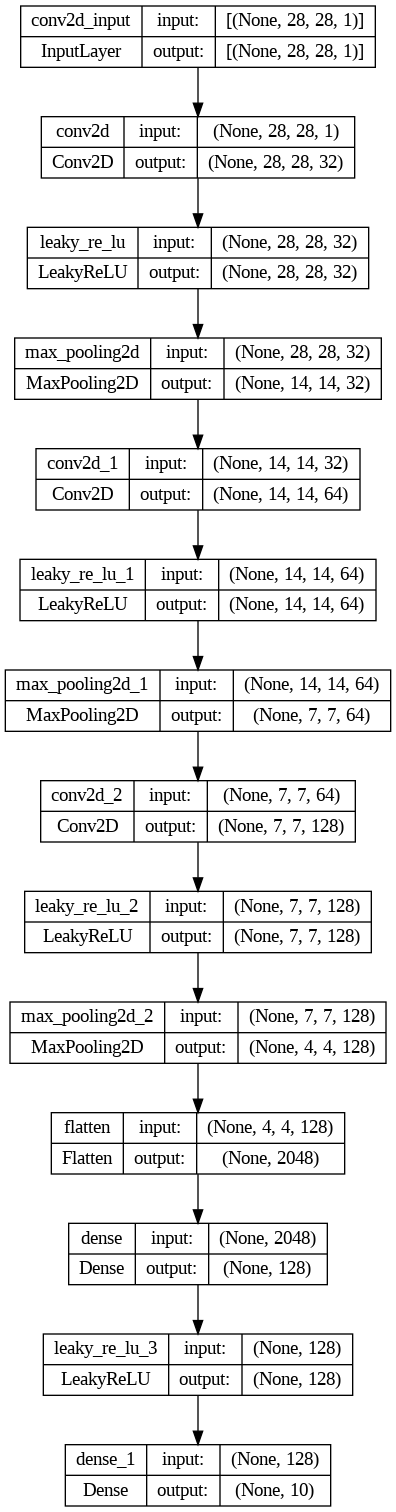

In [20]:
plot_model(model,to_file='mlp.mnist.png',show_shapes=True)

## Train the Model

In [21]:
train_model = model.fit(train_X,y_train_label,epochs=epochs,batch_size=batch_size,verbose=1,validation_data=(valid_X,valid_y))

Epoch 1/20
750/750 [==============================] - 14s 9ms/step - loss: 0.4669 - accuracy: 0.8299 - val_loss: 0.3161 - val_accuracy: 0.8868
Epoch 2/20
750/750 [==============================] - 7s 10ms/step - loss: 0.2852 - accuracy: 0.8949 - val_loss: 0.2681 - val_accuracy: 0.9008
Epoch 3/20
750/750 [==============================] - 4s 6ms/step - loss: 0.2419 - accuracy: 0.9116 - val_loss: 0.2403 - val_accuracy: 0.9114
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2088 - accuracy: 0.9221 - val_loss: 0.2478 - val_accuracy: 0.9092
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1836 - accuracy: 0.9323 - val_loss: 0.2242 - val_accuracy: 0.9166
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1586 - accuracy: 0.9398 - val_loss: 0.2189 - val_accuracy: 0.9192
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1388 - accuracy: 0.9477 - val_loss: 0.2343 - val_accuracy: 0.9197
Epoc

In [22]:
test_acc = model.evaluate(test_X,test_y_one_hot,verbose=0)

In [23]:
test_acc = model.evaluate(test_X,test_y_one_hot,verbose=0)
print('test loss:',test_acc[0])
print('test accuracy:',test_acc[1])

test loss: 0.47411736845970154
test accuracy: 0.9143000245094299


In [24]:
train_model.history

{'loss': [0.46694114804267883,
  0.2852476239204407,
  0.2418830394744873,
  0.20880882441997528,
  0.18359993398189545,
  0.15864895284175873,
  0.13876472413539886,
  0.11798888444900513,
  0.09941774606704712,
  0.08783307671546936,
  0.07584328949451447,
  0.06666091084480286,
  0.05438453331589699,
  0.050294179469347,
  0.04122961312532425,
  0.04046470299363136,
  0.032590631395578384,
  0.03276665136218071,
  0.0320340134203434,
  0.03109803795814514],
 'accuracy': [0.8298958539962769,
  0.8948749899864197,
  0.9116458296775818,
  0.9220625162124634,
  0.9323124885559082,
  0.9397916793823242,
  0.9477291703224182,
  0.9550416469573975,
  0.9623749852180481,
  0.9673958420753479,
  0.9710624814033508,
  0.9755833148956299,
  0.979812502861023,
  0.981124997138977,
  0.9850000143051147,
  0.9850208163261414,
  0.9883333444595337,
  0.9879166483879089,
  0.9881666898727417,
  0.9886041879653931],
 'val_loss': [0.3160562217235565,
  0.2681139409542084,
  0.2402895987033844,
  0.24

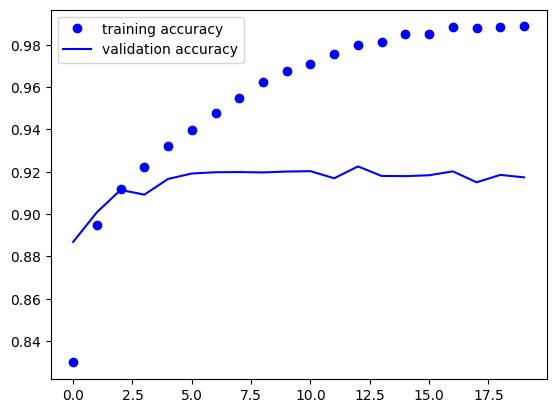

In [25]:
accuracy = train_model.history['accuracy']
val_accuracy = train_model.history['val_accuracy']
losss = train_model.history['loss']
val_loss = train_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='training accuracy')
plt.plot(epochs,val_accuracy,'b',label='validation accuracy')
plt.legend()

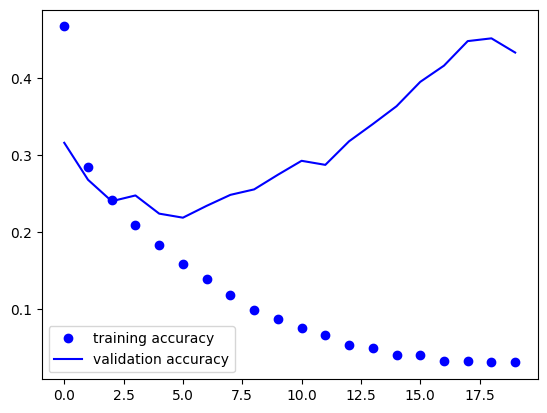

In [26]:

losss = train_model.history['loss']
val_loss = train_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,losss,'bo',label='training accuracy')
plt.plot(epochs,val_loss,'b',label='validation accuracy')
plt.legend()

# Adding dropouts


In [27]:
batch_size = 64
epochs = 20
num_classes = 10

In [28]:

#Convolution Layers
fmodel = Sequential()
fmodel.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(28, 28, 1)))
fmodel.add(LeakyReLU(alpha=0.1))
fmodel.add(MaxPooling2D((2, 2), padding='same'))
fmodel.add(Dropout(0.25)) # Dropout layer to avoid overfitting
fmodel.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
fmodel.add(LeakyReLU(alpha=0.1))
fmodel.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
fmodel.add(Dropout(0.25)) # Dropout layer to avoid overfitting
fmodel.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
fmodel.add(LeakyReLU(alpha=0.1))
fmodel.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
fmodel.add(Dropout(0.4)) # Dropout layer to avoid overfitting
fmodel.add(Flatten())

#Fully Connected Layers
fmodel.add(Dense(128, activation='linear'))
fmodel.add(LeakyReLU(alpha=0.1))
fmodel.add(Dropout(0.3)) # Dropout layer to avoid overfitting
fmodel.add(Dense(num_classes, activation='softmax')) # Output layer with softmax activation function


In [29]:
fmodel.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [30]:
H =fmodel.fit(train_X, y_train_label, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(valid_X, valid_y))


Epoch 1/20
750/750 [==============================] - 7s 7ms/step - loss: 0.5949 - accuracy: 0.7804 - val_loss: 0.3833 - val_accuracy: 0.8592
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3793 - accuracy: 0.8610 - val_loss: 0.3402 - val_accuracy: 0.8740
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3325 - accuracy: 0.8762 - val_loss: 0.2804 - val_accuracy: 0.8950
Epoch 4/20
750/750 [==============================] - 4s 6ms/step - loss: 0.3066 - accuracy: 0.8862 - val_loss: 0.2618 - val_accuracy: 0.9035
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2869 - accuracy: 0.8937 - val_loss: 0.2492 - val_accuracy: 0.9061
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2709 - accuracy: 0.8991 - val_loss: 0.2468 - val_accuracy: 0.9088
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 0.2589 - accuracy: 0.9036 - val_loss: 0.2373 - val_accuracy: 0.9123
Epoch 

In [31]:
test_acc = fmodel.evaluate(test_X, test_y_one_hot, verbose=0)
print('test loss:', test_acc[0])
print('test accuracy:', test_acc[1])

test loss: 0.22576718032360077
test accuracy: 0.920799970626831


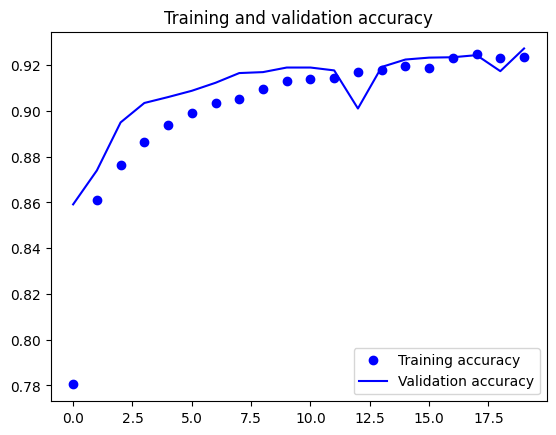

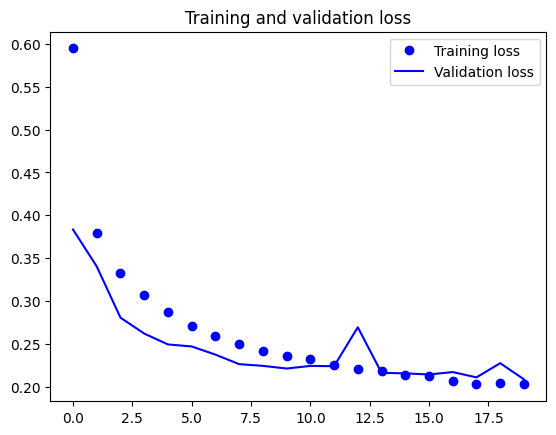

In [32]:
accuracy = H.history['accuracy']
val_accuracy = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()